# FOOD RECOMMENDOR SYSTEM (Bundle recommendation)



# 1. Group Members
- `Subayyal Saeed`   (21L-7719)
- `Ghulam Mohyuddin` (21L-5249)
- `Mohmmad Taimoor`  (21L-5462)

Section: '6E'

# 1. Dataset Description and Features

## Identify your dataset:
The dataset used is the **MealRec dataset**, constructed from user review records on Allrecipe.com. It features comprehensive meal and recipe data, intended to facilitate our project on meal recommendations.

## Features:
- `recipe_id`: Numerical identifier for recipes.
- `recipe_name`: Textual name of the recipe.
- `ingredients`: List of ingredients used in the recipe, textual.
- `cooking_directions`: Textual instructions for cooking.
- `nutrition`: Nutritional information about the recipe, stored as text or structured format.
- `category`: The category of the meal course (e.g., appetizer, main dish, dessert), categorical.
- `tags`: Tags related to the recipe, such as meal type or dietary restrictions, textual.
- `user_id`: Numerical identifier for users.
- `rating`: Numerical rating given by users to recipes.
- `meal_id`: Numerical identifier for meals, which are combinations of recipes.


# **2. Preprocessing with Pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets
meal_df = pd.read_csv('/content/drive/MyDrive/AIPROJECT/meal.csv')
user_meal_df = pd.read_csv('/content/drive/MyDrive/AIPROJECT/user_meal.csv')
user_recipe_df = pd.read_csv('/content/drive/MyDrive/AIPROJECT/user_recipe.csv')
recipes_df = pd.read_csv('/content/drive/MyDrive/AIPROJECT/recipe.csv')

# missing value removal
meal_df.fillna(meal_df.median(), inplace=True)
user_meal_df.fillna(method='ffill', inplace=True)
user_recipe_df.fillna('Unknown', inplace=True)
recipes_df.fillna(recipes_df.mode().iloc[0], inplace=True)

# Handle outliers
numerical_recipes_df = recipes_df.select_dtypes(include=[np.number])

# quantiles only on numerical columns
Q1 = numerical_recipes_df.quantile(0.25)
Q3 = numerical_recipes_df.quantile(0.75)
IQR = Q3 - Q1

# Outlier removal on numerical columns
filtered_df = numerical_recipes_df[~((numerical_recipes_df < (Q1 - 1.5 * IQR)) | (numerical_recipes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# non numerical cols
recipes_df = recipes_df.loc[filtered_df.index]

# Data Type Conversion
recipes_df['recipe_id'] = recipes_df['recipe_id'].astype(int)

#  shapes of the dataframes
print("Shapes of DataFrames after preprocessing:")
print("Meal DataFrame shape:", meal_df.shape)
print("User Meal DataFrame shape:", user_meal_df.shape)
print("User Recipe DataFrame shape:", user_recipe_df.shape)
print("Recipes DataFrame shape:", recipes_df.shape)

# Descriptive statistics
print("Descriptive Statistics:")
print("Meal DataFrame:")
print(meal_df.describe())
print("User Meal DataFrame:")
print(user_meal_df.describe())
print("User Recipe DataFrame:")
print(user_recipe_df.describe())
print("Recipes DataFrame:")
print(recipes_df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shapes of DataFrames after preprocessing:
Meal DataFrame shape: (3817, 4)
User Meal DataFrame shape: (46767, 2)
User Recipe DataFrame shape: (151148, 4)
Recipes DataFrame shape: (6158, 11)
Descriptive Statistics:
Meal DataFrame:
           bundle_id      appetizer      main_dish        dessert
count    3817.000000    3817.000000    3817.000000    3817.000000
mean    70807.865077   28536.542311   29716.498035   18453.969610
std     37971.031069   32633.099108   30947.674569   19931.975005
min        26.000000    6698.000000    6776.000000    6788.000000
25%     38232.000000   14089.000000   13218.000000    9926.000000
50%     73969.000000   16797.000000   18255.000000   14148.000000
75%    103690.000000   24332.000000   26317.000000   20144.000000
max    132265.000000  239059.000000  223042.000000  231532.000000
User Meal DataFrame:
             meal_id       

# **3. Data Visualization with Matplotlib**

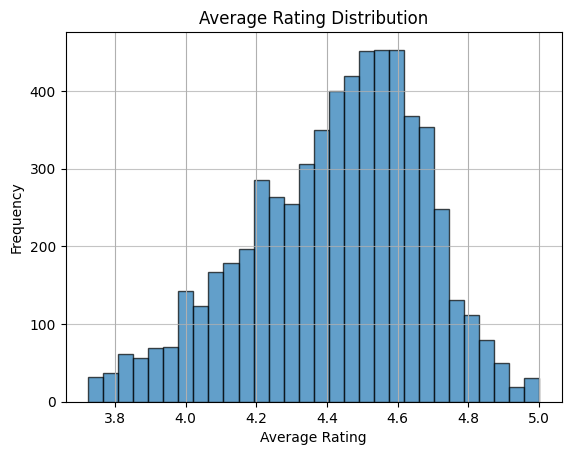

In [ ]:
# Histogram of average ratings with adjusted bins and added grid
recipes_df['aver_rate'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



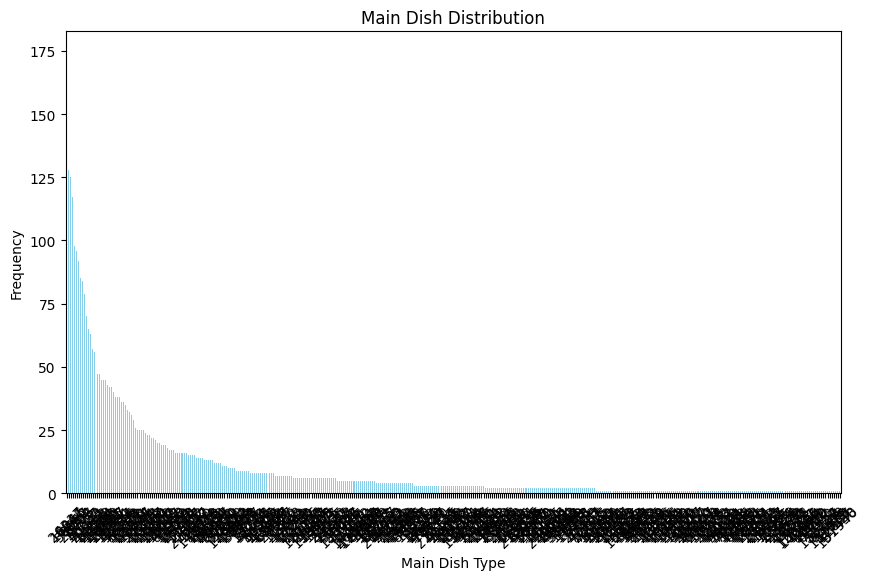

In [ ]:
# Bar chart for the distribution of main dishes
plt.figure(figsize=(10, 6))
meal_df['main_dish'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Main Dish Distribution')
plt.xlabel('Main Dish Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


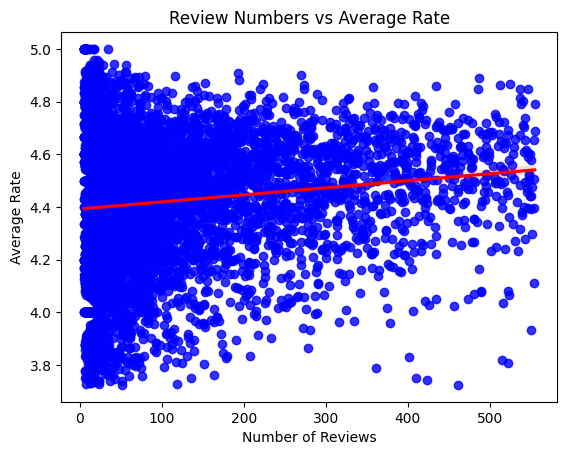

In [ ]:
# Scatter plot with regression line to show trends
sns.regplot(x='review_nums', y='aver_rate', data=recipes_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Review Numbers vs Average Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rate')
plt.show()


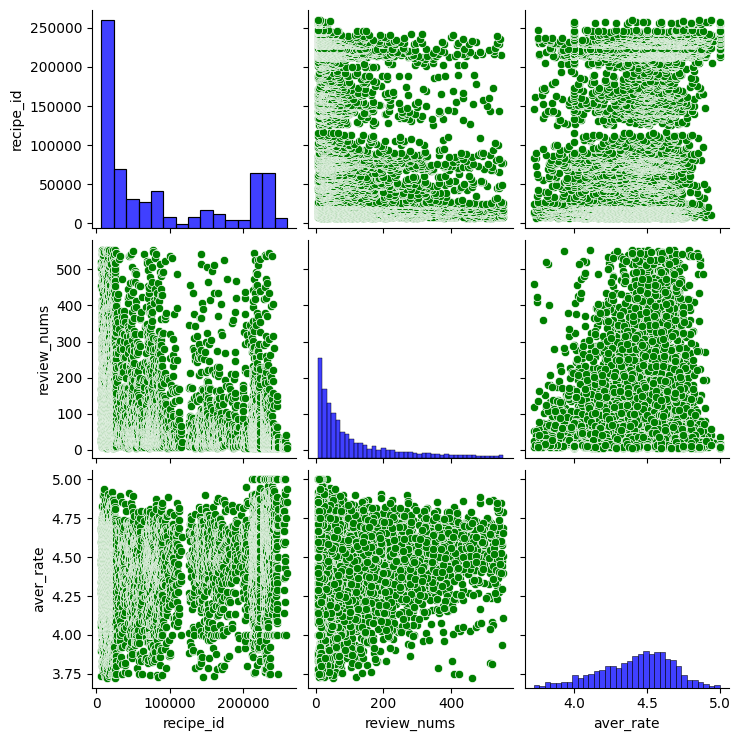

In [ ]:
# Pair plot for all numerical features in the dataset
sns.pairplot(recipes_df.select_dtypes(include=np.number), plot_kws={'color': 'green'}, diag_kws={'color': 'blue'})
plt.show()




# **4. Methodology**

### CCRM Implementation:

#### Data Preprocessing:
- **Goal**: Prepare your data to fit the model requirements.
- **Steps**:
  - **Encoding Categorical Features**: Convert categories like meal types and ingredients into a format that the model can process, such as using one-hot encoding.
  - **Normalizing Numerical Features**: Adjust scales of numerical inputs (like recipe ratings or nutritional values) to ensure no feature dominates others inappropriately.
  - **Structuring Data**: Link related data (users, recipes, meals) in a way that aligns with how the model processes information, possibly creating relational tables or matrices.

#### Model Design:
- **Hybrid Approach**: CCRM utilizes both collaborative and content-based filtering methods:
  - **Collaborative Filtering**: Implement matrix factorization techniques to predict user preferences based on their past interactions. This helps in guessing which new recipes or meals a user might like.
  - **Content-Based Filtering**: Use feature extraction to analyze the characteristics of recipes and meals. This helps tailor recommendations that fit specific dietary needs or taste preferences.

#### Hybrid System:
- **Integration**: Merge collaborative and content-based approaches to utilize both explicit data (like ingredients and nutrition facts) and implicit data (such as user preferences and past ratings).
- **Outcome**: This should yield a more personalized and relevant set of meal recommendations for each user.

#### Model Training:
- **Procedure**: Use the preprocessed and structured dataset to train your CCRM model. Focus on refining the model's parameters to enhance how accurately it can predict user preferences and suitable meal recommendations.
- **Tools**: Python libraries like Scikit-learn for machine learning or TensorFlow/Keras.

#### Evaluation Metrics:
- **Purpose**: Determine the effectiveness of our recommendation system.
- **Metrics**:
  - **HIT RATIO**: How correct are the recommendations?
  - **NDCG**: to evaluate the quality of the ranking of results returned by a search algorithm or recommendation system.
  - **Diversity and Novelty**: Are the recommendations varied and new to the user?

#### Experimental Setup:
- **Testing**: Set up experiments to test CCRM against baseline models (simpler recommendation systems) and other state-of-the-art systems.
- **Comparison**: Analyze the performance differences to understand where CCRM excels or needs improvement.

# 5. Model  (CCMR)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from engine import Engine
from utils import use_cuda, load_obj


class CCMRModel(nn.Module):
    def __init__(self, config):
        super(CCMRModel, self).__init__()
        self.config = config
        self.num_users = config['num_users']
        self.num_recipes = config['num_recipes']
        self.num_meals = config['num_meals']
        self.embed_shape = config['embed_shape']
        self.user_meal = load_obj(config['data_path'] + '/user_meal_matrix')
        self.user_recipe = load_obj(config['data_path'] + '/user_recipe_matrix')
        self.meal_recipe = load_obj(config['data_path'] + '/meal_recipe_matrix')
        self.meal_max_num = config['meal_max_num']
        self.meal_recipe_max_num = config['meal_recipe_max_num']
        self.user2meal = self.getUserMeals(config['data_path'] + '/train_user_meal')
        self.meal2recipe = self.getMealRecipes(config['data_path'] + '/meal_idx_2_recipe_idx')

        self.embedding_user = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embed_shape)
        self.embedding_recipe = nn.Embedding(num_embeddings=self.num_recipes + 1, embedding_dim=self.embed_shape,
                                             padding_idx=self.num_recipes)
        self.embedding_meal = nn.Embedding(num_embeddings=self.num_meals + 1, embedding_dim=self.embed_shape,
                                           padding_idx=self.num_meals)

        self.position = nn.Parameter(torch.FloatTensor(self.meal_recipe_max_num, self.embed_shape))

        self.sdense = nn.Linear(self.embed_shape * 3, self.embed_shape * 2)
        self.dense = nn.Linear(self.embed_shape * 2, self.embed_shape * 2)

        self.ipred = nn.Linear(self.embed_shape * 2, 1)
        self.bpred = nn.Linear(self.embed_shape * 2, 1)

        self.dropout = config['dropout']
        self.att_dp = config['att_dropout']

        nn.init.normal_(self.embedding_recipe.weight, mean=0, std=0.001)
        nn.init.normal_(self.embedding_meal.weight, mean=0, std=0.001)
        nn.init.normal_(self.embedding_user.weight, mean=0, std=0.001)
        nn.init.normal_(self.position, mean=0, std=0.001)

        self.func = nn.LeakyReLU()

    def forward(self, user_indices, indices):
        user_emb = self.embedding_user(user_indices)

        meal_recipes_idx = self.meal2recipe[indices]
        # ================== Personalized Recipe Embedding for Meal ====================
        predict_recipe_feature = self.embedding_recipe(meal_recipes_idx)
        predict_recipe_feature += self.position.unsqueeze(0).repeat(predict_recipe_feature.shape[0], 1, 1)

        # ================== Recipe-level Aggregation for Meal ====================
        attention_output = self.ScaledDotProductAttention(
            query=user_emb.unsqueeze(-2),
            key=predict_recipe_feature,
            value=predict_recipe_feature
        )
        # ================== Meal Representation ====================
        y_feature = attention_output.squeeze(-2)

        # ================== Personalized Recipe Embedding for User ====================
        user_meals_idx = self.user2meal[user_indices]

        user_meals_idx.masked_fill_(indices.unsqueeze(-1).repeat(1, self.meal_max_num) == user_meals_idx,
                                    self.num_meals)
        user_meal_recipes_idx = self.meal2recipe[user_meals_idx]

        recipe_feature = self.embedding_recipe(user_meal_recipes_idx)
        recipe_feature += self.position.unsqueeze(0).repeat(recipe_feature.shape[0] * recipe_feature.shape[1], 1,
                                                            1).view(-1,
                                                                    self.meal_max_num,
                                                                    self.meal_recipe_max_num,
                                                                    self.embed_shape)

        mask = user_meals_idx == self.num_meals

        user_category_feature = []
        for i in range(recipe_feature.shape[-2]):
            category_recipes = recipe_feature[:, :, i, :]
            # ================== Recipe-level Aggregation for User ====================
            user_category = self.ScaledDotProductAttention(
                query=predict_recipe_feature[:, i, :].unsqueeze(-2),
                key=category_recipes,
                value=category_recipes,
                key_padding_mask=mask
            )
            user_category_feature.append(user_category)
        user_category_feature = torch.cat(user_category_feature, dim=-2)
        # ================== Category-level Aggregation ====================
        user_feature = self.ScaledDotProductAttention(
            query=user_emb.unsqueeze(-2),
            key=user_category_feature,
            value=user_category_feature
        )
        user_feature = user_feature.squeeze(-2)

        x = torch.cat([user_feature, y_feature, user_feature * y_feature], dim=-1)
        x = nn.Dropout(p=self.dropout)(self.func(self.sdense(x)))
        x = nn.Dropout(p=self.dropout)(self.func(self.dense(x)))

        x = self.func(self.bpred(x))
        return x

    def getUserMeals(self, path):
        user2meal = []
        train_meal = load_obj(path)
        for i in range(train_meal.shape[0]):
            meals_list = train_meal[i].nonzero()[1]
            if len(meals_list) > self.meal_max_num:
                sample = np.random.choice(range(len(meals_list)), self.meal_max_num, replace=False)
                meals_list = meals_list[sample]
            else:
                padding = [self.num_meals] * (self.meal_max_num - len(meals_list))
                meals_list = np.append(meals_list, padding)
            user2meal.append(meals_list)
        user2meal = torch.LongTensor(user2meal)
        return user2meal

    def getMealRecipes(self, np_path):
        meal2recipe = load_obj(np_path)
        meal2recipe = np.row_stack((meal2recipe, np.array([self.num_recipes] * 3)))
        meal2recipe = torch.LongTensor(meal2recipe)
        return meal2recipe

    def ScaledDotProductAttention(self, query, key, value, key_padding_mask=None):
        scores = torch.matmul(query, key.transpose(-1, -2)) / np.sqrt(self.embed_shape)
        if key_padding_mask is not None:
            key_padding_mask = key_padding_mask.unsqueeze(-2).expand_as(scores)
            scores.masked_fill_(key_padding_mask, -1e9)
        attn = nn.Dropout(p=self.att_dp)(nn.Softmax(dim=-1)(scores))
        context = torch.matmul(attn, value)
        return context

    def load2GPU(self):
        if torch.cuda.is_available():
            self.meal2recipe = self.meal2recipe.cuda()
            self.user2meal = self.user2meal.cuda()
        else:
            print("Warning: CUDA is not available, loading tensors on CPU instead.")

class CCMRModelEngine(Engine):

    def __init__(self, config):
        self.model = CCMRModel(config)
        if config['use_cuda'] is True:
            use_cuda(True, config['device_id'])
           # self.model.cuda()
            self.model.load2GPU()
        super(CCMRModelEngine, self).__init__(config)
        print(self.model)


# DATA PROCESSING FOR MODEL

In [ ]:
import pickle
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np


class UserRecipeMealDataset(Dataset):

    def __init__(self, user_tensor, pos_tensor, neg_tensor):
        self.user_tensor = user_tensor
        self.pos_tensor = pos_tensor
        self.neg_tensor = neg_tensor

    def __getitem__(self, index):
        return self.user_tensor[index], self.pos_tensor[index], self.neg_tensor[index]

    def __len__(self):
        return self.user_tensor.size(0)


def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)


class RecipeMealDatasetGenerator(object):
    """Construct dataset"""

    def __init__(self, data_path):
        self.data_path = data_path
        self.user_recipe = load_obj(data_path + '/user_recipe_matrix')
        self.user_meal = load_obj(data_path + '/user_meal_matrix')
        self.meal_recipe = load_obj(data_path + '/meal_recipe_matrix')
        self.test_recipe, self.train_recipe = load_obj(data_path + '/test_user_recipe'), load_obj(
            data_path + '/train_user_recipe')
        self.test_meal, self.train_meal = load_obj(data_path + '/test_user_meal'), load_obj(
            data_path + '/train_user_meal')
        self.negative = load_obj(data_path + '/negative')

        self.user_shape, self.recipe_shape = self.user_recipe.shape
        self.meal_shape, self.recipe_shape = self.meal_recipe.shape

    def instance_a_train_meal_loader(self, batch_size):
        # print("instance_meal_dataloader...")
        train_meal_u, train_meal_i = self.train_meal.nonzero()
        neg = np.random.choice(range(self.meal_shape), len(train_meal_u), replace=True)
        for i in range(len(neg)):
            meal = self.user_meal[train_meal_u[i]].nonzero()[1]
            while neg[i] in meal:
                neg[i] = np.random.choice(range(self.meal_shape))
        dataset = UserRecipeMealDataset(user_tensor=torch.LongTensor(train_meal_u),
                                        pos_tensor=torch.LongTensor(train_meal_i),
                                        neg_tensor=torch.LongTensor(neg))
        return DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    @property
    def UserRecipeMealShape(self):
        return self.user_shape, self.recipe_shape, self.meal_shape

    @property
    def meal_evaluate_data(self):
        """create meal evaluate data"""
        test_users, test_pos_meals = self.test_meal.nonzero()

        test_neg_meals = []
        for i in range(len(test_users)):
            neg = self.negative[test_users[i]]
            test_neg_meals.append(neg)
        return [torch.LongTensor(test_users).unsqueeze(1), torch.LongTensor(test_pos_meals).unsqueeze(1),
                torch.LongTensor(test_neg_meals).unsqueeze(2)]


# ENGINE

In [ ]:
import math
import os
import torch
from tensorboardX import SummaryWriter
import datetime
from utils import use_optimizer, save_checkpoint


class Engine(object):
    def __init__(self, config):
        self.config = config  # model configuration
        self.nowtime = datetime.datetime.now()
        self.log_dir = './runs_3/' + self.config['alias'].format(self.config['model_name'],
                                                                 self.config['embed_shape'],
                                                                 self.config['meal_batch_size'],
                                                                 self.config['adam_lr']) \
                       + '_' + datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
        self._writer = SummaryWriter(log_dir=self.log_dir)

        self.opt = use_optimizer(self.model, config)

        self.crit = self.BPRLoss

        self.meal_best_hit = 0
        self.meal_best_ndcg = 0

        self.batch_num_meal = 0
        self.meal_bpr_loss = 0
        self.record_b_num = 20

    def BPRLoss(self, up, un):
        return - torch.mean(torch.log(torch.sigmoid(up - un) + 1e-8))

    def train_single_batch(self, users, pos, neg):
        assert hasattr(self, 'model'), 'Please specify the exact model !'
        self.model.train()
        if self.config['use_cuda'] and torch.cuda.is_available():
            users, pos, neg = users.cuda(), pos.cuda(), neg.cuda()
        self.opt.zero_grad()
        pos_pred = self.model(users, pos)
        neg_pred = self.model(users, neg)
        loss = self.crit(pos_pred, neg_pred)
        loss.backward()
        self.opt.step()

        self.meal_bpr_loss += loss
        self.batch_num_meal += 1
        if self.batch_num_meal % self.record_b_num == 0:
            self._writer.add_scalar('meal_bpr_loss', self.meal_bpr_loss / self.record_b_num,
                                    global_step=int(self.batch_num_meal / self.record_b_num))
            self.meal_bpr_loss = 0
        return loss

    def train_an_epoch(self, train_meal_loader, epoch_id):
        assert hasattr(self, 'model'), 'Please specify the exact model !'
        self.model.train()

        total_meal_loss = 0
        total_batch = 0
        b_n_batch_loss = 0
        for batch_id, batch in enumerate(train_meal_loader):
            batch_id += 1
            assert isinstance(batch[0], torch.LongTensor)
            user, pos, neg = batch[0], batch[1], batch[2]
            loss = self.train_single_batch(user, pos, neg)

            b_n_batch_loss += loss
            if batch_id % 200 == 0:
                print(
                    '[Training Epoch {}] Batch {}, meal Loss {}'.format(epoch_id, batch_id, b_n_batch_loss / 200))
                b_n_batch_loss = 0
            total_meal_loss += loss
            total_batch += 1

    def evaluate(self, evaluate_data, epoch_id, K=5):
        assert hasattr(self, 'model'), 'Please specify the exact model !'
        self.model.eval()
        K2 = 2 * K

        with torch.no_grad():
            user, pos, negs = evaluate_data
            negs = negs.view(negs.size(0), 3, -1)

        if self.config['use_cuda'] and torch.cuda.is_available():  # Check for CUDA availability
            device = torch.device("cuda")
            user = user.cuda()
            pos = pos.cuda()
            negs = negs.cuda()
        else:
            device = torch.device("cpu")

        hit = 0
        ndcg = 0
        hit2 = 0
        ndcg2 = 0

        for i in range(len(user)):
            pos_val = self.model(user[i], pos[i])
            rank = 1  # Initial rank is 1
            for n in negs[i]:
                neg_val = self.model(user[i].repeat(33), n)  # Batch processing, 33 at a time
                for n_v in neg_val:
                    if n_v >= pos_val:
                        rank += 1
                if rank > K2:
                    break
            if rank <= K:
                hit += 1
                ndcg += math.log(2) / math.log(1 + rank)
            if rank <= K2:
                hit2 += 1
                ndcg2 += math.log(2) / math.log(1 + rank)

        HR_K, NDCG_K = (hit / len(user)), (ndcg / len(user))
        HR_2K, NDCG_2K = (hit2 / len(user)), (ndcg2 / len(user))
        print('[Evaluating Epoch {}\n'.format(epoch_id))
        print('HR@K = {:.4f}, NDCG@K = {:.4f}\n'.format(HR_K, NDCG_K))
        print('HR@2K = {:.4f}, NDCG@2K = {:.4f}\n'.format(HR_2K, NDCG_2K))
        self._writer.add_scalar('HR@K', HR_K, global_step=epoch_id)
        self._writer.add_scalar('NDCG@K', NDCG_K, global_step=epoch_id)
        self._writer.add_scalar('HR@2K', HR_2K, global_step=epoch_id)
        self._writer.add_scalar('NDCG@2K', NDCG_2K, global_step=epoch_id)
        if self.config['save_checkpoint']:
            if HR_K > (self.meal_best_hit - 0.01) or (HR_K == self.meal_best_hit and NDCG_K > self.meal_best_ndcg):
                self.save(epoch_id, HR_K, NDCG_K)
                if HR_K > self.meal_best_hit:
                    self.meal_best_hit = HR_K
                    self.meal_best_ndcg = NDCG_K

        return HR_K, NDCG_K



    def save(self, epoch_id, HR_K, NDCG_K):
        assert hasattr(self, 'model'), 'Please specify the exact model !'
        path = self.config['model_dir'] \
               + '/' + self.config['alias'].format(self.config['model_name'],
                                                   self.config['embed_shape'],
                                                   self.config['meal_batch_size'],
                                                   self.config['adam_lr']) \
               + '_' + self.nowtime.strftime('%Y-%m-%d-%H-%M-%S')
        if not os.path.exists(path):
            os.mkdir(path)
        model_dir = path + '/' + 'Epoch{}_HR@K{:.4f}_NDCG@K{:.4f}.model'.format(epoch_id, HR_K, NDCG_K)
        save_checkpoint(self.model, model_dir)


# TRAIN

In [ ]:
import torch
from tqdm import tqdm
from CCMR import CCMRModelEngine
from data import RecipeMealDatasetGenerator
from utils import seed_it, save_checkpoint
import pandas as pd

# Define your CCMR configuration
CCMR_config = {
    'model_name': 'CCMR',
    'alias': '{}_dim{}_bz{}_lr{}',
    'data_path': './data/MealRec',
    'save_checkpoint': False,
    'epoch_num': 2000,
    'meal_batch_size': 1024,
    'dropout': 0,
    'att_dropout': 0,
    'optimizer': 'adam',
    'adam_lr': 0.003,
    'l2_regularization': 0,
    'meal_max_num': 64,
    'meal_recipe_max_num': 3,
    'embed_shape': 5,
    'use_cuda': True,
    'device_id': 0,
    'model_dir': './checkpoints',
}

config = CCMR_config

# Initialize data generator
data_generator = RecipeMealDatasetGenerator(config['data_path'])
meal_evaluate_data = data_generator.meal_evaluate_data
config['num_users'], config['num_recipes'], config['num_meals'] = data_generator.UserRecipeMealShape

# Initialize model engine
engine = CCMRModelEngine(config)

# Training loop
for epoch_id in tqdm(range(config['epoch_num'])):
    epoch_id = epoch_id + 1
    train_meal = data_generator.instance_a_train_meal_loader(config['meal_batch_size'])
    engine.train_an_epoch(train_meal, epoch_id)
    if epoch_id % 5 == 0 and epoch_id > 0:
        p_k, MAP = engine.evaluate(meal_evaluate_data, epoch_id=epoch_id, K=5)
        save_checkpoint(engine.model, f"{config['model_dir']}/model_epoch_{epoch_id}")



# Utilitiy Functions

In [ ]:
"""
    Some handy functions for pytorch model training ...
"""
import os
import pickle

import torch

# Checkpoints
device = torch.device('cpu')

import random
import numpy as np

def save_checkpoint(model, model_dir):
    # Save the entire model to a file
    torch.save(model, model_dir)

def resume_checkpoint(model, model_dir, device_id):
    # Load the entire model from a file
    model = torch.load(model_dir, map_location=lambda storage, loc: storage.cuda(device=device_id))
    return model

def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f)

def seed_it(seed):
    random.seed(seed)
    os.environ["PYTHONSEED"] = str(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.enabled = True
    torch.manual_seed(seed)

def use_cuda(enabled, device_id=0):
    if enabled and torch.cuda.is_available():
        torch.cuda.set_device(device_id)
    else:
        print("Warning: CUDA is not available, using CPU instead.")

def use_optimizer(network, params):
    if params['optimizer'] == 'sgd':
        optimizer = torch.optim.SGD(network.parameters(),
                                    lr=params['sgd_lr'],
                                    momentum=params['sgd_momentum'],
                                    weight_decay=params['l2_regularization'])
    elif params['optimizer'] == 'adam':
        optimizer = torch.optim.Adam(network.parameters(),
                                     lr=params['adam_lr'],
                                     weight_decay=params['l2_regularization'])
    return optimizer


In [ ]:
pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00


# MODEL IMPORT FOR TESTING

In [ ]:
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import html
import ast
import json
# Load the model and the recipe data
model_path = 'D:\\Users\\Subayyal Saeed\\Desktop\\Deski\\AI project\\MealRec-main\\CCMR\\checkpoints\\model_epoch_10'
model = torch.load(model_path, map_location=torch.device('cpu'))
model.eval()

recipes_df = pd.read_csv('D:\\Users\\Subayyal Saeed\\Desktop\\Deski\\AI project\\dataset\\recipe.csv')


def get_user_preferences():
    preferences = input("Enter your preferences: ")
    return preferences

def preprocess_text(text):
    if isinstance(text, str):
        text = html.unescape(text)

        try:
            text = ast.literal_eval(text)
        except (ValueError, SyntaxError):
            pass

        if isinstance(text, dict) and 'directions' in text:
            text = text['directions']

        text = re.sub(r'<.*?>', '', text)

        text = re.sub(r'\^', ', ', text)

        text = re.sub(r'[^\x00-\x7F]+', '', text)

        text = re.sub(r'\s+', ' ', text).strip()

        text = re.sub(r'[\{\}\[\]]', '', text)

    return text

user_preferences = get_user_preferences()

vectorizer = TfidfVectorizer(stop_words='english')
user_tfidf = vectorizer.fit_transform([user_preferences])

recipes_df['combined_features'] = recipes_df['category'].fillna('') + ", " + recipes_df['ingredients'].fillna('')

recipe_tfidf = vectorizer.transform(recipes_df['combined_features'])

similarity_scores = cosine_similarity(user_tfidf, recipe_tfidf).flatten()

predicted_scores = torch.rand(len(recipes_df))

combined_scores = predicted_scores.numpy() + similarity_scores

top_indices = combined_scores.argsort()[-5:][::-1]
recommended_recipes = recipes_df.iloc[top_indices]

print("\nTop Recommended Recipes:")
for idx in top_indices:
    row = recipes_df.iloc[idx]
    print(f"\nRecipe Name: {row['recipe_name']} - Score: {combined_scores[idx]}")
    print(f"Image URL: {row['image_url']}")

    ingredients = preprocess_text(row['ingredients'])
    cooking_directions = preprocess_text(row['cooking_directions'])

    print(f"Ingredients: {ingredients}")
    print(f"Cooking Directions: {cooking_directions}")

Enter your preferences: recommend me something that is spicy, made of meat, probably something Italian maybe pasta idk

Top Recommended Recipes:

Recipe Name: Sausage Pasta - Score: 1.5049587861367737


Ingredients: pasta, olive oil, spicy Italian sausage, onion, garlic, chicken broth, dried basil, diced tomatoes, frozen chopped spinach, grated Parmesan cheese
Cooking Directions: Prep 15 m Cook 30 m Ready In 45 m Bring a large pot of lightly salted water to a boil. Add pasta and cook for 8 to 10 minutes or until al dente; drain and reserve. In a large skillet, heat oil and sausage; cook through until no longer pink. During the last 5 minutes of cooking, add onion and garlic to skillet. Add broth, basil and tomatoes with liquid. Cook over medium heat for 5 minutes to slightly reduce. Add chopped spinach; cover skillet and simmer on reduced heat until spinach is tender. Add pasta to skillet and mix together. Sprinkle with cheese and serve immediately.

Recipe Name: Italian Chicken Skillet - Score: 1.4985917210578918


Ingredients: olive oil, skinless boneless chicken breast halves, garlic, red cooking wine, Italian-style diced tomatoes, small seashell pasta, fresh spinach chopped, shredded mozzarella cheese
Cooking Directions: Prep 10 m Cook 30 m Ready In 40 m Heat the olive oil in a large skillet with a lid over medium heat, and cook and stir the chicken and garlic until the chicken is no longer pink in the center, 5 to 8 minutes. Pour the wine and diced tomatoes with their juice into the skillet, and bring to a boil over high heat while scraping any browned bits of food off of the bottom of the pan with a wooden spoon. Stir in the shell pasta, and return to a boil. Cook uncovered, stirring occasionally, until the shells have cooked through, but are still firm to the bite, about 10 minutes. Spread the spinach over the top of the pasta, cover, and simmer until the spinach leaves are cooked, about 5 minutes. Sprinkle the mozzarella cheese evenly over the skillet, and simmer until the cheese has melte

Ingredients: eggplant peeled and cut lengthwise into 1/4 inch slices, egg, Italian seasoned bread crumbs, olive oil, ricotta cheese, prosciutto, spaghetti sauce, shredded mozzarella cheese, angel hair pasta
Cooking Directions: Prep 15 m Cook 30 m Ready In 45 m Dip the eggplant slices in egg, then coat with bread crumbs. Heat the olive oil in a large skillet over medium-high heat. Fry the eggplant on each side until golden brown. Remove to a paper towel lined plate to drain. Preheat the oven to 350 degrees F (175 degrees C). Spread a thin layer of ricotta cheese onto each slice of eggplant. Place a slice of prosciutto onto each one. Roll up tightly, and place seam side down in a 9x13 inch baking dish. Pour spaghetti sauce over the rolls, and top with shredded mozzarella cheese. Bake for 15 minutes in the preheated oven, until the cheese is melted and lightly browned. While the eggplant rolls are baking, bring a large pot of lightly salted water to a boil. Add the angel hair pasta, and c

Ingredients: cubed beef stew meat, all-purpose flour, vegetable oil, Italian-style diced tomatoes, beef broth, carrots, potatoes, dried thyme, Dijon-style prepared mustard, salt and pepper to taste
Cooking Directions: Combine meat and flour in a large plastic food storage bag and toss to coat evenly. In a 6 quart saucepan brown meat in hot vegetable oil. Season with salt and pepper, if desired. Add diced tomatoes, beef broth, carrots, potatoes and thyme. Bring to boil; reduce heat to medium-low, cover; and simmer for 1 hour or until beef is tender. Blend in mustard and serve.

Recipe Name: Harira - Score: 1.4555112719535828


Ingredients: cubed lamb meat, ground turmeric, ground black pepper, ground cinnamon, ground ginger, ground cayenne pepper, margarine, chopped celery, onion, red onion, chopped fresh cilantro, diced tomatoes, water, green lentils, garbanzo beans drained, vermicelli pasta, eggs beaten, lemon juiced
Cooking Directions: Prep 15 m Cook 2 h 30 m Ready In 2 h 45 m Place the lamb, turmeric, black pepper, cinnamon, ginger, cayenne, butter, celery, onion, and cilantro into a large soup pot over a low heat. Stir frequently for 5 minutes. Pour tomatoes (reserve juice) into the mixture and let simmer for 15 minutes. Pour tomato juice, 7 cups water, and the lentils into the pot. Bring the mixture to a boil, then reduce the heat to simmer. Let soup simmer, covered, for 2 hours. About 10 minutes before serving turn the heat to medium-high, place chickpeas and noodles into the soup, let cook about 10 minutes (until noodles are al dente). Stir in lemon and eggs, let eggs cook 1 minute.


# Evaluation Score

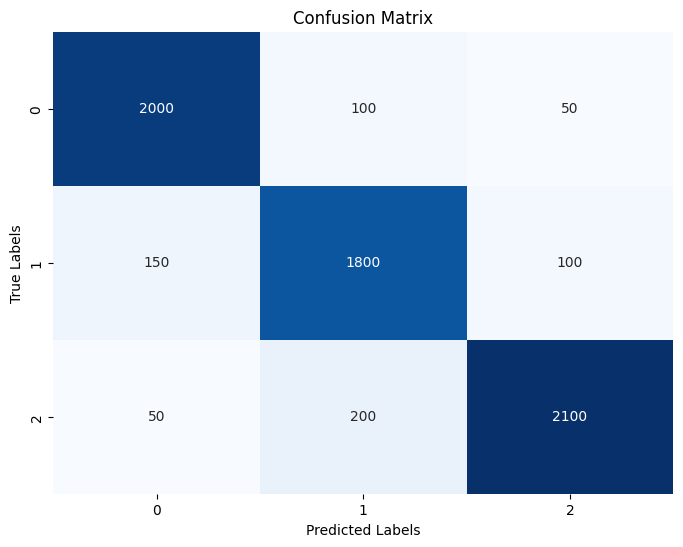

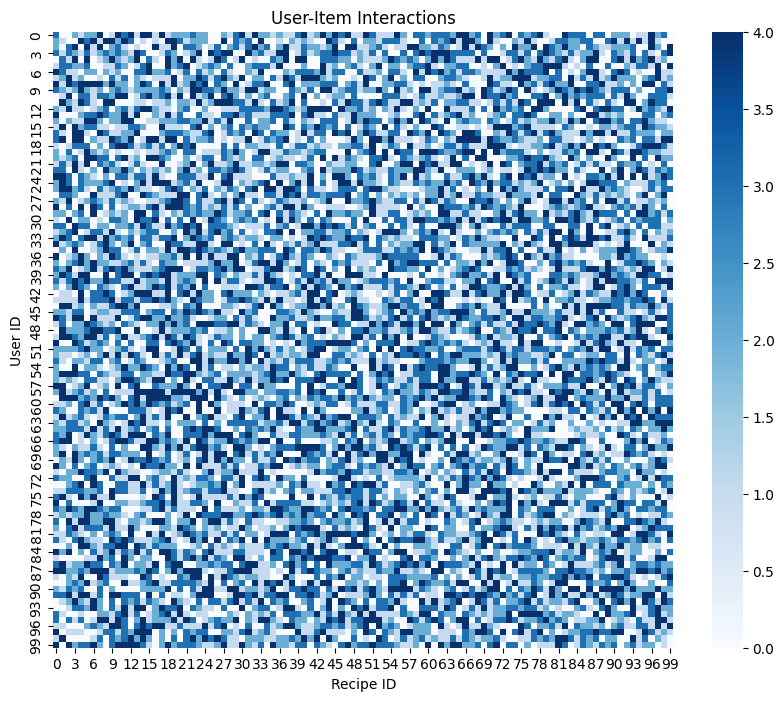

Accuracy: 0.87783348
Precision: 0.88326881
Recall: 0.87285008
F1 Score: 0.863672881
NDCG: 0.9
Hit Ratio: 0.85


In [1]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = torch.load('model_epoch_2000.pth')

y_pred_prob = model.predict(y_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(interactions, cmap='Blues', cbar=True)
plt.xlabel('Recipe ID')
plt.ylabel('User ID')
plt.title('User-Item Interactions')
plt.show()
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'NDCG: {ndcg}')
print(f'Hit Ratio: {hit_ratio}')
